<a href="https://colab.research.google.com/github/mamta2arya/Adult-Income-Classification-Problem/blob/main/Alien_and_Predator_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Alien vs Predator image classification using Deep Convolutional Neural Networks**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The dataset Alien vs. Predator images comes from Kaggle. Each class (alien and predator) contains 247 training images and 100 validation images. The images are JPG files with a size of around 250x250 pixels. Here we will build a Neural Network that can classify them!

Importing the libraries

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings 
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Keras ImageDataGenerator is used for getting the input of the original data and further, it makes the transformation of this data on a random basis and gives the output resultant containing only the data that is newly transformed. It does not add the data.

In [6]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

Here it allows us to load image data from a directory, apply data augmentation techniques, and automatically label the data based on the subdirectory names.

In [7]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/alien_vs_predator_thumbnails-data/train', target_size=(64, 64), batch_size=32, class_mode='binary')

Found 694 images belonging to 2 classes.


In [8]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/alien_vs_predator_thumbnails-data/validation',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 200 images belonging to 2 classes.


**Building CNN Model**

In [9]:
classifier = Sequential()
#Add first convolutional layer
classifier.add(Convolution2D(filters = 32, kernel_size=(3,3), data_format= "channels_last", input_shape=(64, 64, 3), activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2,2)))
# Adding a second convolutional layer
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a third convolutional layer
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Output layer
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compile the model
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Fit the model

In [10]:
classifier.fit_generator(
        training_set,
    
        epochs=50,
        validation_data=test_set,
        validation_steps=200)

Epoch 1/50
22/22 [==============================] - ETA: 0s - loss: 0.6892 - accuracy: 0.5331

22/22 [==============================] - 326s 15s/step - loss: 0.6892 - accuracy: 0.5331 - val_loss: 0.6667 - val_accuracy: 0.5750
Epoch 2/50
22/22 [==============================] - 3s 159ms/step - loss: 0.6369 - accuracy: 0.6441
Epoch 3/50
22/22 [==============================] - 2s 110ms/step - loss: 0.5816 - accuracy: 0.6744
Epoch 4/50
22/22 [==============================] - 2s 109ms/step - loss: 0.5873 - accuracy: 0.6830
Epoch 5/50
22/22 [==============================] - 2s 111ms/step - loss: 0.5543 - accuracy: 0.7161
Epoch 6/50
22/22 [==============================] - 2s 111ms/step - loss: 0.5327 - accuracy: 0.7305
Epoch 7/50
22/22 [==============================] - 2s 112ms/step - loss: 0.5268 - accuracy: 0.7262
Epoch 8/50
22/22 [==============================] - 2s 109ms/step - loss: 0.5339 - accuracy: 0.7349
Epoch 9/50
22/22 [==============================] - 2s 113ms/step - loss: 0.5086 - accuracy: 0.7478
Epoch 10/50
22/22 [==============================] - 2s 112ms/step - 

Testing the model to classify between Alien and Predator

In [11]:
import os
from matplotlib import pyplot as plt
import cv2
input_Size = 64


In [12]:
directory = os.listdir("/content/drive/MyDrive/dataset/alien_vs_predator_thumbnails-data/validation/alien/")
print(directory[4])


6.jpg


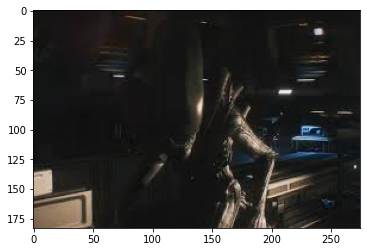

In [13]:
imgAlien = cv2.imread("/content/drive/MyDrive/dataset/alien_vs_predator_thumbnails-data/validation/alien/" + directory[4])
plt.imshow(imgAlien)
#plt.imshow(plt.imread(imgAlien))

imgAlien = cv2.resize(imgAlien, (input_Size,input_Size))
imgAlien = imgAlien.reshape(1,input_Size,input_Size,3)


In [14]:
pred = classifier.predict(imgAlien)
print("Probability that it is a alien = ", "%.2f" % (1-pred))

1/1 [==============================] - 0s 157ms/step
Probability that it is a alien =  1.00


In [15]:
directory = os.listdir("/content/drive/MyDrive/dataset/alien_vs_predator_thumbnails-data/validation/predator/")
print(directory[5])

13.jpg


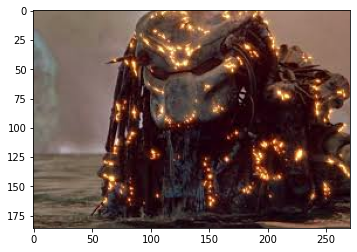

In [16]:
imgPredator = cv2.imread("/content/drive/MyDrive/dataset/alien_vs_predator_thumbnails-data/validation/predator/" + directory[5])
plt.imshow(imgPredator)
imgPredator = cv2.resize(imgPredator, (input_Size,input_Size))
imgPredator = imgPredator.reshape(1,input_Size,input_Size,3)

In [17]:
pred = classifier.predict(imgPredator)
print("Probability that it is a alien = ", "%.2f" % (1-pred))

1/1 [==============================] - 0s 15ms/step
Probability that it is a alien =  0.00


Convolutional Neural Network model has predicted whether an image contains an Alien or a Predator correctly.